# 1. Choosing functions and generating data

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the functions
def f1(x):
    return 2 * x + 3

def f2(x):
    return x**2 + 2 * x + 1

def f3(x):
    return 2 * np.sin(x) + 3

def f4(x):
    return x * np.sin(x-1)**2 + 2 

# Generate the dataset
x = np.linspace(-10, 10, 5000)
y1 = f1(x)
y2 = f2(x)
y3 = f3(x)
y4 = f4(x)

# Prepare the data
y = np.column_stack((y1, y2, y3, y4))

In [3]:
# Split the data into training and test sets
X_train, X_test ,y_train, y_test = train_test_split(x, y, random_state=22)

* **Making noisy data:** 

*Caution : Only run if you wanna inject some noise data!*


In [ ]:
# Adding noise to the input
xnoise = np.random.uniform(-10, 10, 200)
ynoise = np.random.normal(4, 6, 200)

y_noisy = np.column_stack((ynoise,ynoise,ynoise,ynoise))


X_train = np.append(X_train ,xnoise)
y_train = np.vstack((y_train ,y_noisy))

# 2. Building the model and adjusting it

In [4]:
# Define the MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4)
])

# Compile and train the model
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=250, batch_size=32)


Epoch 1/250
118/118 [==============================] - 1s 2ms/step - loss: 483.5342
Epoch 2/250
118/118 [==============================] - 0s 2ms/step - loss: 131.5308
Epoch 3/250
118/118 [==============================] - 0s 2ms/step - loss: 39.6173
Epoch 4/250
118/118 [==============================] - 0s 2ms/step - loss: 34.4482
Epoch 5/250
118/118 [==============================] - 0s 2ms/step - loss: 30.2095
Epoch 6/250
118/118 [==============================] - 0s 2ms/step - loss: 25.6977
Epoch 7/250
118/118 [==============================] - 0s 3ms/step - loss: 21.2820
Epoch 8/250
118/118 [==============================] - 0s 3ms/step - loss: 17.3013
Epoch 9/250
118/118 [==============================] - 0s 2ms/step - loss: 14.0601
Epoch 10/250
118/118 [==============================] - 0s 2ms/step - loss: 11.6255
Epoch 11/250
118/118 [==============================] - 0s 2ms/step - loss: 9.7881
Epoch 12/250
118/118 [==============================] - 0s 2ms/step - loss: 8.4054
E

# 3. Making predictions and Plotting the functions

In [5]:
y_pred = model.predict(X_test)

40/40 [==============================] - 0s 2ms/step


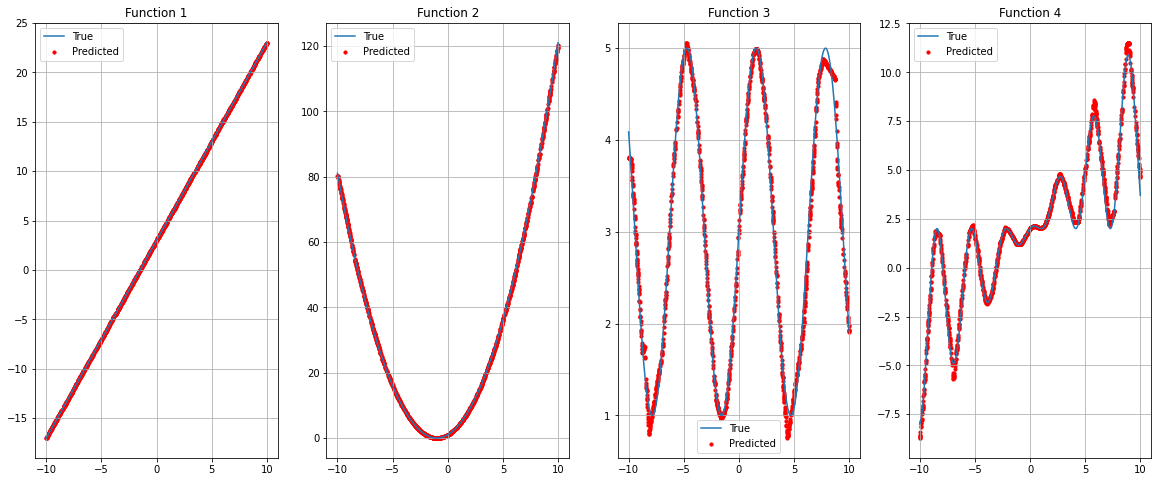

In [6]:
plt.figure(figsize=(20, 8))
plt.subplot(141)
plt.plot(x, y1 , label='True' )
plt.scatter(X_test, y_pred[:, 0], c='r', s=10, label='Predicted')
plt.title('Function 1')
plt.legend()
plt.grid()

plt.subplot(142)
plt.plot(x, y2 , label='True' )
plt.scatter(X_test, y_pred[:, 1], c='r', s=10, label='Predicted')
plt.title('Function 2')
plt.legend()
plt.grid()

plt.subplot(143)
plt.plot(x, y3 , label='True' )
plt.scatter(X_test, y_pred[:, 2], c='r', s=10, label='Predicted')
plt.title('Function 3')
plt.legend()
plt.grid()

plt.subplot(144)
plt.plot(x, y4 , label='True' )
plt.scatter(X_test, y_pred[:, 3], c='r', s=10, label='Predicted')
plt.title('Function 4')
plt.legend()
plt.grid()

# 4. Evaluation with new unseen data

In [7]:
# Genarating new data
x_val = np.random.randint(-10, 10, 1000)
y1_val = f1(x_val)
y2_val = f2(x_val)
y3_val = f3(x_val)
y4_val = f4(x_val)

# Prepare the data
X_val = np.column_stack((x_val, x_val, x_val, x_val))
y_val = np.column_stack((y1_val, y2_val, y3_val, y4_val))

print (f"MSE : {model.evaluate(x_val, y_val, verbose=0)}")

MSE : 0.03318995237350464
